![user-user](./wallpaper.jpg)

# Dimensionality Reduction

In [30]:
import time
import typing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Clustering

- https://flothesof.github.io/k-means-numpy.html
- https://en.wikipedia.org/wiki/K-means_clustering
- https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae

In [42]:
class Cluster:
    """
    k-means clustering algorithm.
    """

    def __init__(self, points: np.array, k: int) -> None:
        """
        Initialize cluster centroids randomly.
        """
        self.size: int = k
        self.points: np.array = points
        np.random.shuffle(self.points)
        self.centroids: np.array = self.points[:self.size]
        self.indices: np.array = np.empty(self.points.shape[0])
        self.cost: float = -1
    
    def get_cluster(self, k: int) -> np.array:
        """
        Returns specific group.
        """
        return self.points[self.indices == k]

    def get_clusters(self) -> typing.Generator[np.array, None, None]:
        """
        Returns all clusters arrays.
        """
        return (
            self.points[self.indices == k]
            for k in range(self.size)
            if np.any(self.indices == k)
        )
    
    def move(self) -> np.array:
        """
        Moves cluster to the next centroid.
        """
        deviation: np.array = self.points - self.centroids[:, np.newaxis]
        distances: np.array = np.sqrt(np.nansum(deviation ** 2, axis=2))
        self.indices = np.argmin(distances, axis=0)
        self.centroids = np.array([
            np.nanmean(self.get_cluster(k), axis=0)
            for k in range(self.centroids.shape[0])
            if np.any(self.indices == k)
        ])
        self.cost = np.nansum(np.array([
            (self.points[i] - self.centroids[j]) ** 2
            for i, j in enumerate(self.indices)
        ]))

COST: -1
COST: 6206.045337993268
COST: 1176.6476452438442
COST: 723.8647981118846
COST: 708.1506186896809
COST: 704.81964401662
COST: 700.2475157108973
COST: 695.828462883543
COST: 692.5724068338764
COST: 689.3434021903358
ROWS: 1000
COLS: 2
MISSING: 925
[0 0 0 ... 3 0 2]
[[-0.14831249  1.45313594]
 [-0.09451774  2.65428352]
 [ 1.1568244   1.97067441]
 [-1.98303053  0.00868296]]
CENTROIDS: (4, 2)
INDICES: [0 0 0 0 1 0 1 1 1 3]
COST: 687.137375439205
ITERATIONS: 9
ELAPSED: 0.17237234115600586


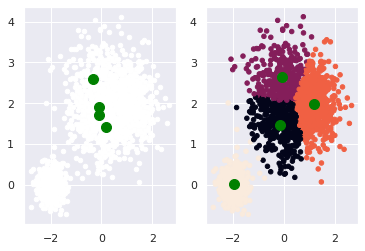

In [43]:
# Parameters.
start: float = time.time()
CLUSTERS: int = 5
ROWS: int = 1000
COLS: int = 2
MAX_ITERATIONS: int = 10

# Dataset generation.
X: np.array = np.vstack([
    np.random.randn(ROWS, COLS) * 0.75 + np.linspace(0, 2, COLS),
    np.random.randn(ROWS, COLS) * 0.25 + np.linspace(-2, 0, COLS),
    np.random.randn(ROWS, COLS) * 0.50 + np.linspace(1, 2, COLS)
]).astype(float)
missing: np.array = np.random.choice(a=[True, False],
                                     size=X.shape[0],
                                     p=[MISSING_RATE, 1 - MISSING_RATE])
X[missing] = np.nan
    
# Cluster initialization.
cluster: Cluster = Cluster(X, CLUSTERS)
plt.subplot(121)
plt.scatter(cluster.points[:, 0], cluster.points[:, 1], color='white', s=20)
plt.scatter(cluster.centroids[:, 0], cluster.centroids[:, 1], color='green', s=100)

# Clustering iteration.
current_cost: float = None
last_cost: float = None
for iterations in range(MAX_ITERATIONS):
    current_cost = cluster.cost
    if current_cost == last_cost:
        break
    last_cost = current_cost
    cluster.move()
    print('COST:', current_cost)

# End of clustering.
plt.subplot(122)
plt.scatter(cluster.points[:, 0], cluster.points[:, 1], c=cluster.indices, s=20)
plt.scatter(cluster.centroids[:, 0], cluster.centroids[:, 1], color='green', s=100)

# Reporting.
print('ROWS:', ROWS)
print('COLS:', COLS)
print('MISSING:', np.count_nonzero(missing))
print(cluster.indices)
print(cluster.centroids)
print('CENTROIDS:', cluster.centroids.shape)
print('INDICES:', cluster.indices[:10])
print('COST:', cluster.cost)
print('ITERATIONS:', iterations)
print('ELAPSED:', time.time() - start)

In [50]:
# Parameters.
start: float = time.time()
CLUSTERS: int = 10
ROWS: int = 1000
COLS: int = 500
MAX_ITERATIONS: int = 10

# Dataset generation.
X: np.array = np.vstack([
    np.random.randn(ROWS, COLS) * 0.75 + np.linspace(0, 2, COLS),
    np.random.randn(ROWS, COLS) * 0.25 + np.linspace(-2, 0, COLS),
    np.random.randn(ROWS, COLS) * 0.50 + np.linspace(1, 2, COLS)
]).astype(float)
missing: np.array = np.random.choice(a=[True, False],
                                     size=X.shape[0],
                                     p=[MISSING_RATE, 1 - MISSING_RATE])
X[missing] = np.nan
    
# Cluster initialization.
cluster: Cluster = Cluster(X, CLUSTERS)

# Clustering iteration.
current_cost: float = None
last_cost: float = None
for iterations in range(MAX_ITERATIONS):
    current_cost = cluster.cost
    if current_cost == last_cost:
        break
    last_cost = current_cost
    cluster.move()
    print('COST:', current_cost)

# Reporting.
print('ROWS:', ROWS)
print('COLS:', COLS)
print('MISSING:', np.count_nonzero(missing))
print('CENTROIDS:', cluster.centroids.shape)
print('INDICES:', cluster.indices[:10])
print('COST:', cluster.cost)
print('ITERATIONS:', iterations)
print('ELAPSED:', time.time() - start)

COST: -1
COST: 1539087.2552650743
COST: 1001688.0377232683
COST: 368819.53347810963
ROWS: 1000
COLS: 500
MISSING: 897
CENTROIDS: (2, 500)
INDICES: [0 0 1 0 0 0 0 0 0 1]
COST: 368819.53347810963
ITERATIONS: 4
ELAPSED: 3.179687023162842


In [51]:
for k, array in enumerate(cluster.get_clusters()):
    print('GROUP', k, array.shape)

GROUP 0 (2319, 500)
GROUP 1 (681, 500)


In [55]:
print(cluster.indices == 1)

[False False  True ...  True False  True]
